In [ ]:
#| hide
# from cjm_torchvision_tfms.core import *

# cjm-torchvision-tfms

> Some custom Torchvision tranforms.

## Install

```sh
pip install cjm_torchvision_tfms
```

## How to use

Image Dims: (384, 512)


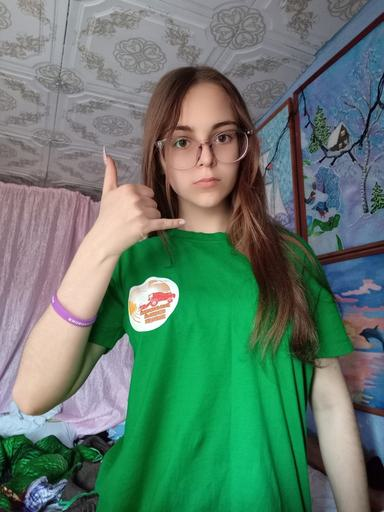

In [ ]:
from PIL import Image

img_path = './images/call-hand-gesture.png'

# Open the associated image file as a RGB image
sample_img = Image.open(img_path).convert('RGB')

# Print the dimensions of the image
print(f"Image Dims: {sample_img.size}")

# Show the image
sample_img

In [ ]:
from cjm_torchvision_tfms.core import ResizeMax, PadSquare, CustomTrivialAugmentWide

import torch
from torchvision import transforms
from cjm_pytorch_utils.core import tensor_to_pil
from cjm_pil_utils.core import stack_imgs

In [ ]:
target_sz = 384

Source image: (384, 512)
Image tensor: torch.Size([1, 3, 512, 384])
Padded tensor: torch.Size([1, 3, 384, 288])


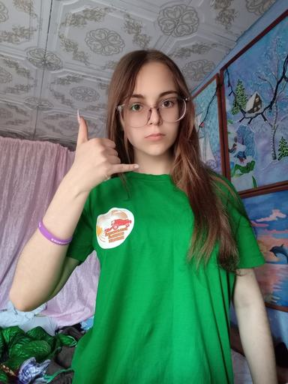

In [ ]:
print(f"Source image: {sample_img.size}")

# Create a `ResizeMax` object
resize_max = ResizeMax(max_sz=target_sz)

# Convert the cropped image to a tensor
img_tensor = transforms.PILToTensor()(sample_img)[None]
print(f"Image tensor: {img_tensor.shape}")

# Resize the tensor
resized_tensor = resize_max(img_tensor)
print(f"Padded tensor: {resized_tensor.shape}")

# Display the updated image
tensor_to_pil(resized_tensor)

Resized tensor: torch.Size([3, 384, 288])
Padded tensor: torch.Size([3, 384, 384])


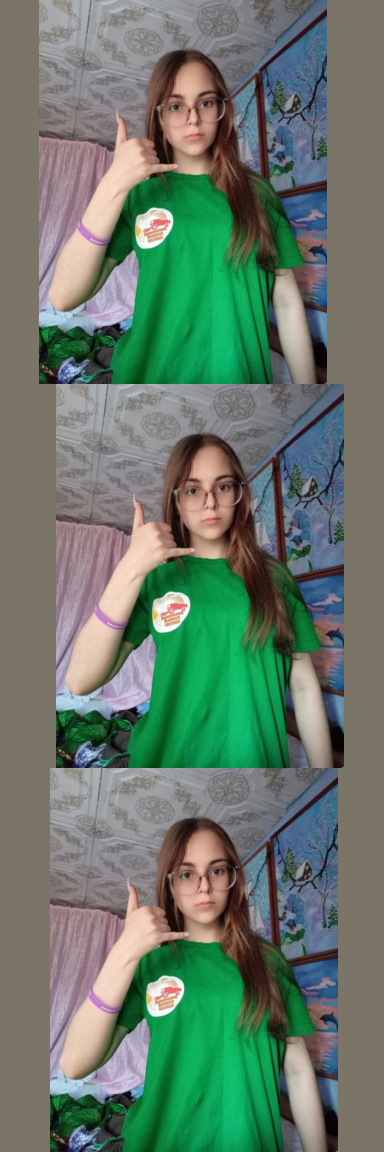

In [ ]:
print(f"Resized tensor: {resized_tensor.shape}")

# Create a `PadSquare` object
pad_square = PadSquare(shift=True)

# Pad the tensor
padded_tensor = pad_square(resized_tensor)
print(f"Padded tensor: {padded_tensor.shape}")

# Display the updated image
stack_imgs([tensor_to_pil(pad_square(resized_tensor)) for i in range(3)])

Augmented tensor: torch.Size([3, 384, 288])


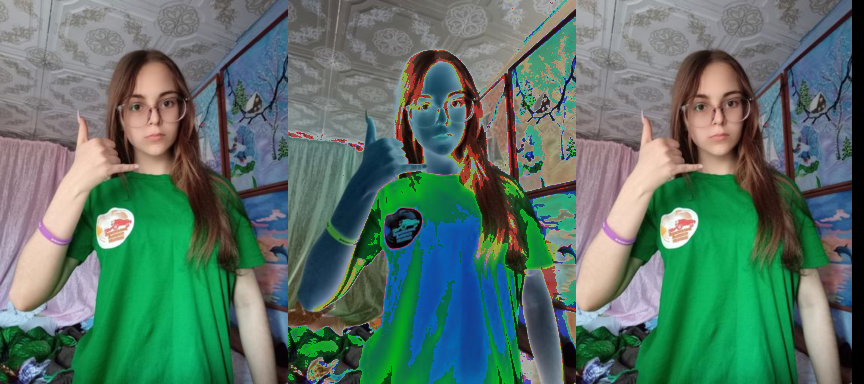

In [ ]:
num_bins = 31

custom_augmentation_space = {
    # Identity operation doesn't change the image
    "Identity": (torch.tensor(0.0), False),
            
    # Distort the image along the x or y axis, respectively.
    "ShearX": (torch.linspace(0.0, 0.25, num_bins), True),
    "ShearY": (torch.linspace(0.0, 0.25, num_bins), True),

    # Move the image along the x or y axis, respectively.
    "TranslateX": (torch.linspace(0.0, 32.0, num_bins), True),
    "TranslateY": (torch.linspace(0.0, 32.0, num_bins), True),

    # Rotate operation: rotates the image.
    "Rotate": (torch.linspace(0.0, 45.0, num_bins), True),

    # Adjust brightness, color, contrast,and sharpness respectively.
    "Brightness": (torch.linspace(0.0, 0.75, num_bins), True),
    "Color": (torch.linspace(0.0, 0.99, num_bins), True),
    "Contrast": (torch.linspace(0.0, 0.99, num_bins), True),
    "Sharpness": (torch.linspace(0.0, 0.99, num_bins), True),

    # Reduce the number of bits used to express the color in each channel of the image.
    "Posterize": (8 - (torch.arange(num_bins) / ((num_bins - 1) / 6)).round().int(), False),

    # Invert all pixel values above a threshold.
    "Solarize": (torch.linspace(255.0, 0.0, num_bins), False),

    # Maximize the image contrast by setting the darkest color to black and the lightest to white.
    "AutoContrast": (torch.tensor(0.0), False),

    # Equalize the image histogram to improve its contrast.
    "Equalize": (torch.tensor(0.0), False),
}

# Create a `CustomTrivialAugmentWide` object
trivial_aug = CustomTrivialAugmentWide(op_meta=custom_augmentation_space)

# Pad the tensor
aug_tensor = trivial_aug(resized_tensor)
print(f"Augmented tensor: {aug_tensor.shape}")

# Display the updated image
stack_imgs([tensor_to_pil(trivial_aug(resized_tensor)) for i in range(3)])